# 배너광고의 A/B 테스트
* 퍼즐컬렉션에서는 매월 게임에서 이용하는 아이템을 세일하고 있습니다. 이 세일은 매상 비율이 높은 중요한 이벤트인데, 어느 날 회사 경영진으로부터 '매상 자체는 높지만 구매율은 그리 높지 않은 것 아닌가?'라는 지적을 받게 되었습니다. 실제로 다른 앱의 세일과 비교한 결과, 아니나 다를까 퍼즐컬렉션의 구매율이 상대적으로 낮음을 알게 되었습니다. 그리하여 구매율이 낮은 원인을 데이터 분석으로 밝혀내어 개선하라는 지시가 내려왔습니다.

## 문제 발견

* 가설
  1. 아이템 세일내용에 문제가 있음
      - 지금 별로 필요하지 않은 아이템을 내놓고 있다.
      - 세일폭이 별로 크지 않아서 유저에게 크게 어필하지 못하고 있다.
  2. 배너광고의 표시내용에 문제가 있음


* 타 부서들과 질의응답 결과
  1. 기획부
  - 아이템 세일에 쓸 만한 것들을 내놓았다고 생각하지만 얼마나 사용하고 있는지 크게 자신은 없음...
  - 세일폭은 50%로 다른 앱과 같고 유저 입장에서도 충분히 싸게 느낄 것임
  2. 마케팅부
  - 아이템 세일의 배너광고는 해당 앱의 디자이너가 만들어 앱에 따라 품질이 제각각임
  - 퍼즐컬렉션의 배너광고는 항상 클릭률이 낮음
  - '배너광고의 표시내용에 문제가 있음'이라는 가설을 분석 테마로 선정

## 데이터 수집과 가공
### 데이터 분석 스토리 정리
* 문제
  - 퍼즐컬렉션의 배너광고 클릭률이 다른 앱보다 낮다. (사실)
  - 퍼즐컬렉션의 배너광고 품질에 문제가 있다. (가설)
* 해결책
  - 클릭률이 높은 배너광고를 조사해서 퍼즐컬렉션의 배너광고를 개선한다.

** 전후비교로는 외부요인을 배제할 수 없음
** A/B 테스트로 외부요인 제거
** A와B의 구분은 임의적이어야 함
  - 퍼즐컬렉션의 유저수가 지난달보다 줄어들었다. (사실)
  - 어딘가 숫자가 줄어든 세그먼트가 있을 것이다. (가설)
  - 그 세그먼트에 적합한 대책을 세워서 유저수를 지난달과 같은 수준으로 회복한다. (해결책)
* 분석에 필요한 데이터 검토
  - DAU(Daily Active User):하루에 한 번 이상 게임을 이용한 유저 데이터
  - user_info:유저의 속성정보 데이터

### 분석에 필요한 데이터 수집

In [1]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
#CSV 파일 읽어 들이기
dau = pd.read_csv('section4-dau.csv')
user_info = pd.read_csv('section4-user_info.csv')

In [2]:
#각각의 데이터 확인
print(dau.head())
print(user_info.head())
print(dau.shape,user_info.shape)

     log_date app_name  user_id
0  2013-08-01  game-01    33754
1  2013-08-01  game-01    28598
2  2013-08-01  game-01    30306
3  2013-08-01  game-01      117
4  2013-08-01  game-01     6605
  install_date app_name  user_id gender  generation device_type
0   2013-04-15  game-01        1      M          40         iOS
1   2013-04-15  game-01        2      M          10     Android
2   2013-04-15  game-01        3      F          40         iOS
3   2013-04-15  game-01        4      M          10     Android
4   2013-04-15  game-01        5      M          40         iOS
(170360, 3) (49526, 6)


### 데이터 가공(전처리)

In [3]:
# DAU데이터에 user_info데이터 결합하기
dau_merge = pd.merge(dau, user_info, on=['user_id', 'app_name'],how='left')
dau_merge.head()

,log_date,app_name,user_id,install_date,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,M,20,iOS
1,2013-08-01,game-01,28598,2013-07-16,M,50,iOS
2,2013-08-01,game-01,30306,2013-07-20,F,30,iOS
3,2013-08-01,game-01,117,2013-04-17,F,20,iOS
4,2013-08-01,game-01,6605,2013-05-02,M,20,iOS


### 데이터 분석

In [11]:
# 세그먼트 분석(성별로 집계)
# 월 별로 집계
dau_merge['log_date']=pd.to_datetime(dau_merge["log_date"])
dau_merge['log_date']=dau_merge['log_date'].dt.strftime('%Y-%m')
dau_merge['install_date']=pd.to_datetime(dau_merge["install_date"])
dau_merge['install_date']=dau_merge['install_date'].dt.strftime('%Y-%m')

# 성별로 집계
b = dau_merge.groupby(['log_date','gender'])['gender'].count()
b.unstack()

gender,F,M
log_date,,
2013-08,47343,46842
2013-09,38027,38148


In [5]:
#세그먼트 분석(연령대별로 집계)
c = dau_merge.groupby(['log_date','generation'])['generation'].count()
c.unstack()

generation,10,20,30,40,50
log_date,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [6]:
#세그먼트 분석(성별과 연령대를 조합해서 집계)
d = dau_merge.groupby(['generation','gender','log_date'])['generation'].count()
d.unstack()

log_date           2013-08  2013-09
generation gender                  
10         F          9091     7316
           M          9694     8075
20         F         17181    13616
           M         16490    13613
30         F         14217    11458
           M         13855    10768
40         F          4597     3856
           M          4231     3638
50         F          2257     1781
           M          2572     2054

In [7]:
# 세그먼트 분석(단말기별로 집계)
e = dau_merge.groupby(['log_date','device_type'])['device_type'].count().unstack()
f = e.reset_index()
g = f.set_index(['log_date'])
g
# 8월에서 9월로 넘어가면서 안드로이드 단말기 유저가 급격히 감소 

device_type,Android,iOS
log_date,,
2013-08,46974,47211
2013-09,29647,46528


## 데이터 분석

* 그래프로 데이터를 시각화하기



<AxesSubplot:xlabel='log_date'>

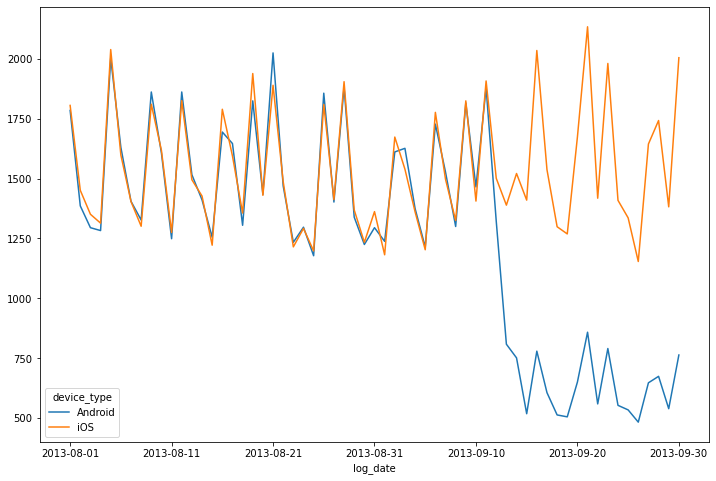

In [10]:
#세그먼트 분석 결과 시각화하기
#세그먼트 분석 결과 시각화하기
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
w = pd.merge(dau, user_info, on=['user_id', 'app_name'],how='left')
u = w.groupby(['log_date','device_type'])['device_type'].count().unstack()
u.plot(figsize=(12, 8), stacked=False)

## 데이터 분석 결과
- 퍼즐컬렉션의 유저수가 지난달보다 줄어들었다. (사실)
- Android 단말기를 이용하는 유저수가 현저히 줄어들었다. (사실)
- Android 단말기에서 게임에 문제가 있는지 찾아내고 해결하여 유저수를 지난달과 같은 수준으로 되돌린다.
  (데이터 분석으로 얻어낸 신빙성 높은 해결책)

## 액션
> 분석 결과를 바탕으로 게임개발부서에 확인해본 결과, 9월 12일에 Android용 게임의 버전업을 실시한 것을 알게되었고, 게임 버전업 후에 구형 Android단말기에서 로그인이 되지 않는 버그가 발생한 것이 드러났고, 시급히 이 버그를 고치기로 하였음.

## 정리
#### 크로스집계를 활용한 세그먼트 분석 진행
>지난달과 비교해서 유저수가 줄어든 것을 문제로 보고 그 원인을 찾아보았고, 데이터를 분석하기 전에 가급적 관계 부서에 정보를 캐묻고 사실을 파악하는 것은 필수지만, 이렇다 할 원인이 밝혀지지 않을 때도 있다는 것을 알게 되었음. 이런 경우 탐색형 데이터 분석을 실시하고 검증할 때 시행착오가 여러 번 발생하기 때문에 지금 밝히고자 하는 문제가 무엇이고 그 가설을 어떻게 세웠었는지 항상 의식하면서 데이터를 주의 깊게 파고드는 것이 중요하다고 느낌.